In [1]:
import functools as ft
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def seq(x, x0, x1, y0, y1):
    return (y1 - y0)/(x1 - x0) * (x - x0) + y0


seq_sol = ft.partial(seq, x0=0.4, x1=0.6, y0=0.82, y1=0.71)
seq_sol(0.42)

0.8089999999999999

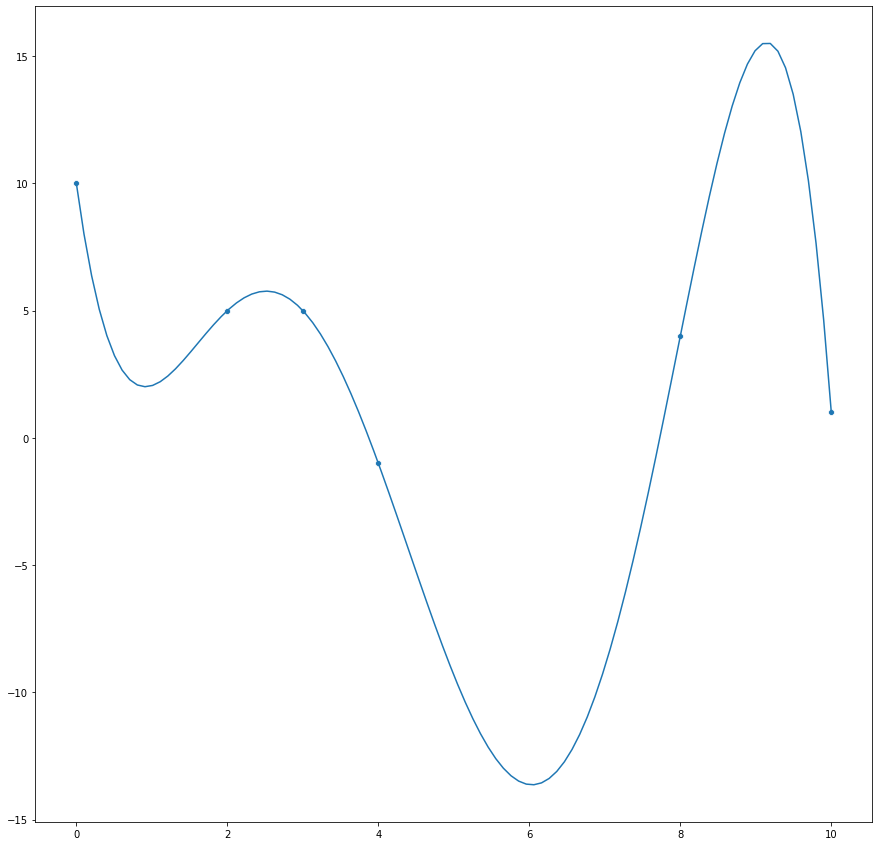

In [3]:
def lip(x_list, dots):
    values = []
    for x in x_list:
        lip_value = 0
        for index_1, dot_1 in enumerate(dots):
            l = 1
            for index_2, dot_2 in enumerate(dots):
                if index_1 != index_2:
                    l *= (x - dot_2[0]) / (dot_1[0] - dot_2[0])
            lip_value += dot_1[-1] * l
        values.append(lip_value)
    
    return values


def plot_lip(x_list, values, dots):
    x_dots, y_dots = list(zip(*dots))
    plt.figure(figsize=(15, 15))
    sns.lineplot(x_list, values)
    sns.scatterplot(x_dots, y_dots)


x_list = np.linspace(0, 10, 100)
dots = [(0, 10), (2, 5), (3, 5), (8, 4), (4, -1), (10, 1)]
values = lip(x_list, dots)
plot_lip(x_list, values, dots)

In [4]:
def find_left(value, fun, start_left):
    x = start_left
    while fun(x) > value: 
        x = x * 2
    return x 
    
    
def find_right(value, fun, start_right):
    x = start_right
    while fun(x) < value:
        x = x * 2
    return x
    

def bin_search_float(value, start_left=-1, start_right=1, fun=lambda x: x ** 2, eps=0.00001):
    left = find_left(value, fun, start_left)
    right = find_right(value, fun, start_right)
    while right - left > eps:
        mid = (left + right) / 2
        if fun(mid) < value:
            left = mid
        else:
            right = mid
            
    return (left + right) / 2

bin_search_float(10)

3.162278175354004

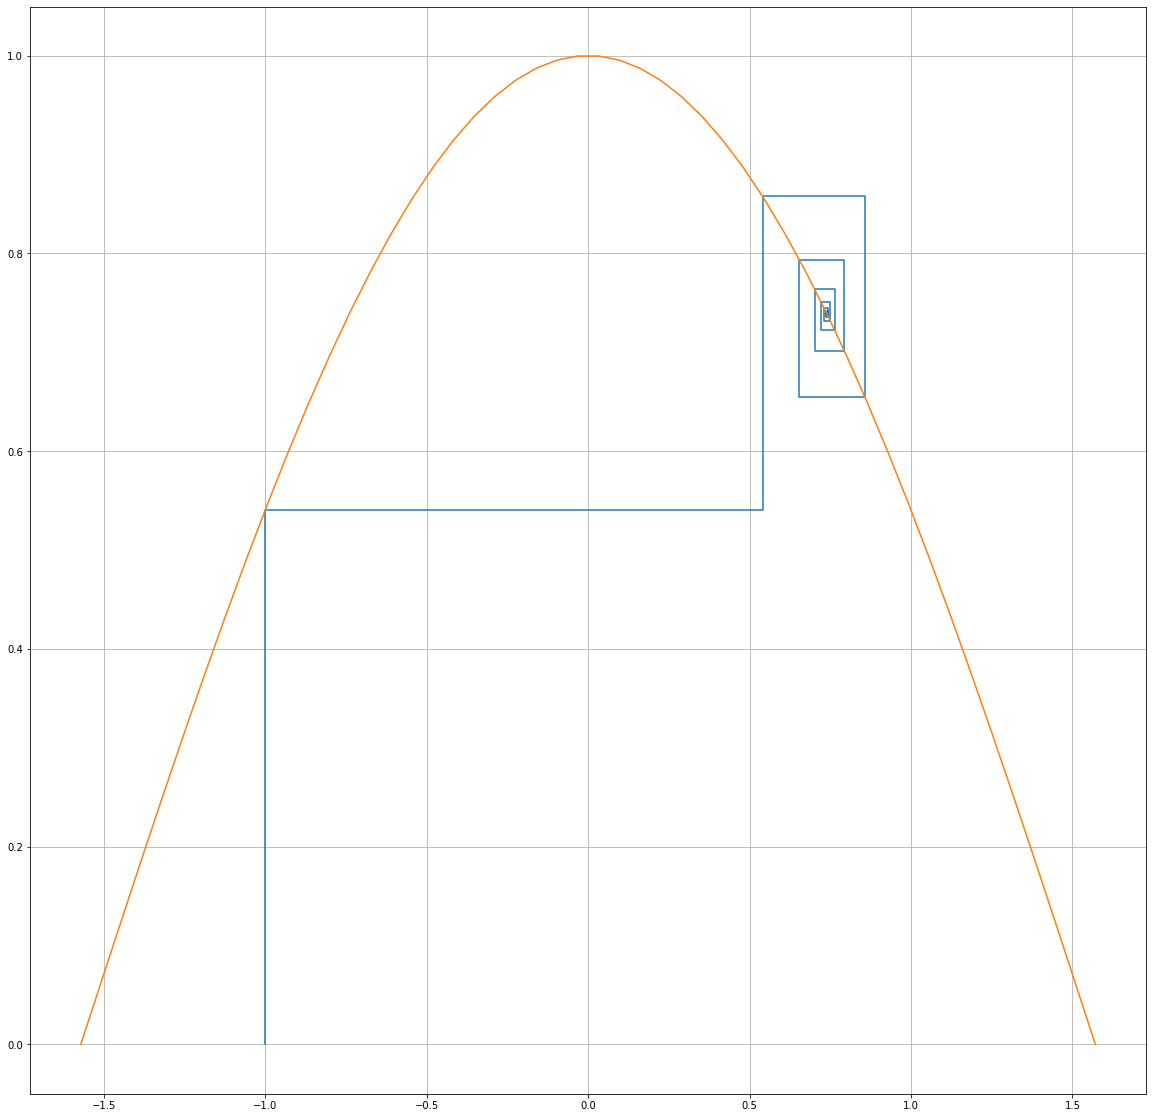

In [5]:
def fpm(start=1, fun=lambda x: np.cos(x), iters=50, min_plot=-1, max_plot=1):
    x_mock = np.linspace(min_plot, max_plot, iters)
    y_mock = [fun(i) for i in x_mock]
    
    x = [start]
    for i in range(iters):
        x.append(fun(x[i]))
    x, y = x[:-1], x[1:]
    
    x_result, y_result = [start], [0] 
    for i in range(iters):
        x_result.append(x[i])
        y_result.append(y[i])
        x_result.append(y[i])
        y_result.append(y[i])
    
    return x_result, y_result, x_mock, y_mock
    

def plot_fpm(x, y, x_mock, y_mock):
    plt.figure(figsize=(20, 20))
    plt.plot(x, y)
    plt.plot(x_mock, y_mock)
    plt.grid()
    
    
'''
Для этого метода необходимо, чтобы притягивающая точка была асимптотически устойчива, то есть выполнялось условие:
|f'(x) < +1|
'''
x, y, x_mock, y_mock = fpm(start=-1, min_plot=-np.pi/2, max_plot=np.pi/2)
plot_fpm(x, y, x_mock, y_mock)

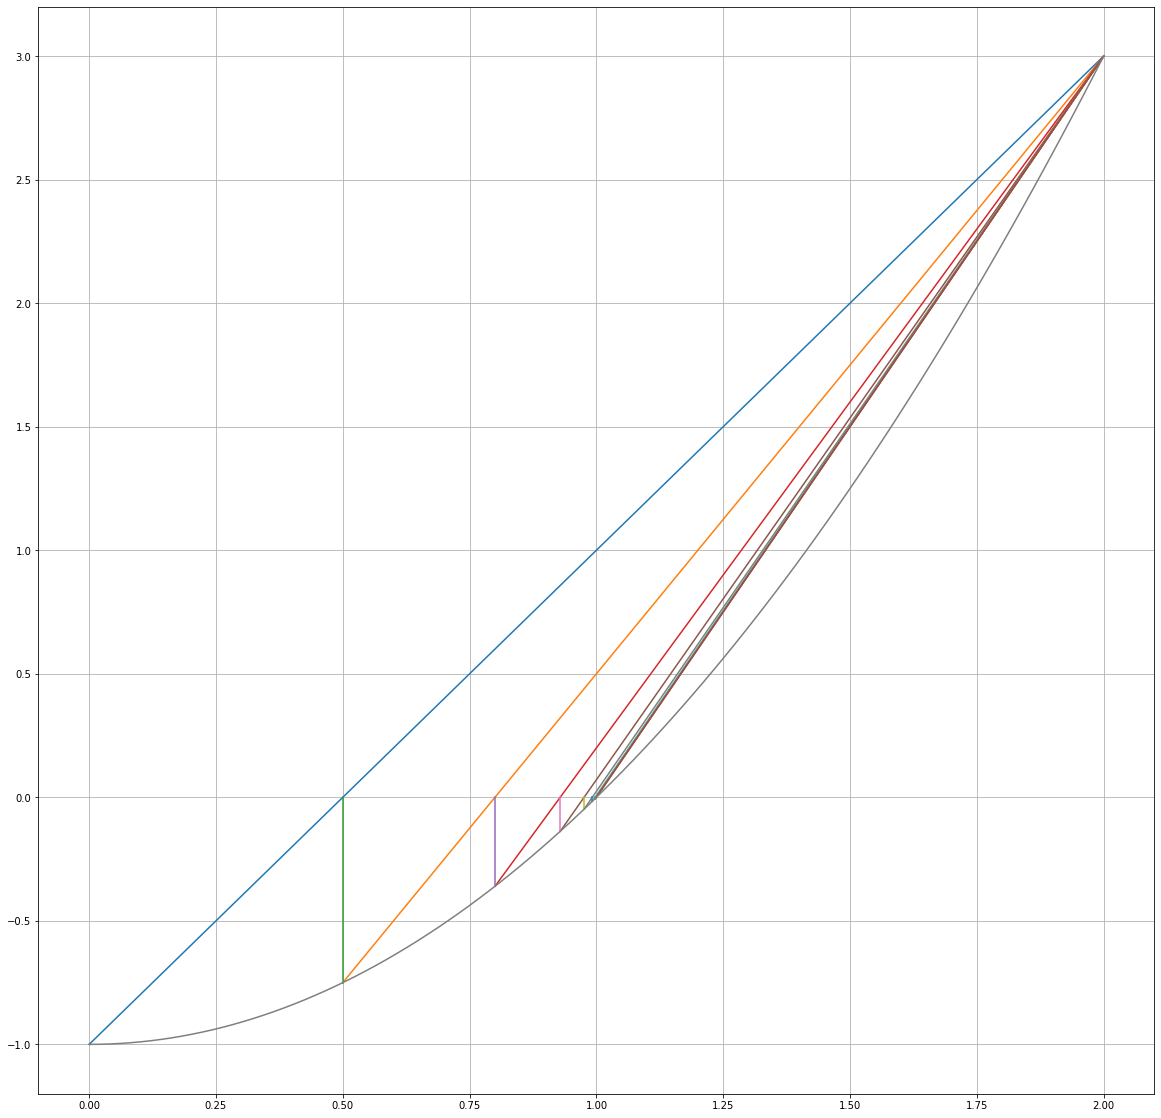

In [13]:
def seq_met(x=0, right=2, fun=lambda x: x ** 2 - 1, eps=0.001):
    result = [(x, fun(x))]
    while abs(fun(x)) > eps:
        x = x - (fun(x) * (x - right)) / (fun(x) - fun(right))
        result.append((x, fun(x)))
    return result, result[-1]


def vis_seq(seqs, right=2, fun=lambda x: x ** 2 - 1):
    plt.figure(figsize=(20, 20))
    flag = False
    for x, y in seqs:
        x_r = np.linspace(x, right) 
        plt.plot(x_r, [seq(x, x_r[0], right, fun(x_r[0]), fun(right)) for x in x_r])
        if flag:
            new_x_r = np.full((2, ), x_r[0])
            new_y_r = np.linspace(0, fun(x_r[0]), 2)
            plt.plot(new_x_r, new_y_r)
        flag = True
    
    x_mock = np.linspace(0, 2, 100)
    y_mock = np.vectorize(fun)(x_mock)
    plt.plot(x_mock, y_mock)
    plt.grid()
    

seqs, answer = seq_met()
vis_seq(seqs)

1.0000000004656613

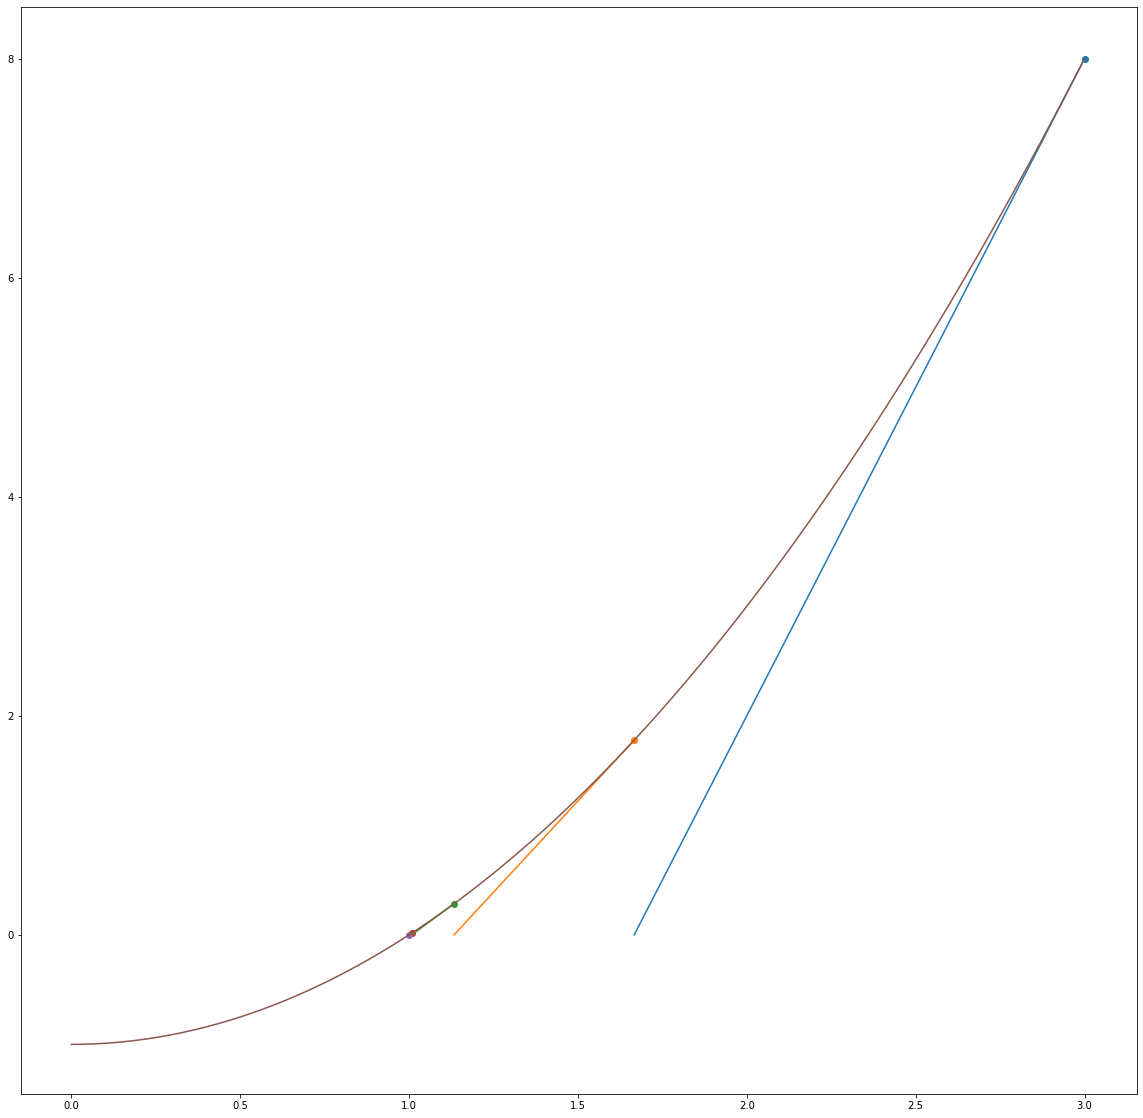

In [30]:
def kas_met(x=3, fun=lambda x: x ** 2 - 1, der=lambda x: 2 * x, eps=0.000000001, r=np.linspace(0, 3, 100)):
    plt.figure(figsize=(20, 20))
    while abs(fun(x)) > eps:
        tmp = x
        x = x - fun(x) / der(x)
        x_r = [x, tmp]
        y_r = [0, fun(tmp)]
        plt.plot(x_r, y_r)
        plt.scatter(tmp, fun(tmp))
    
    plt.plot(r, [fun(i) for i in r])
    
    return x


kas_met()

In [8]:
def int_mwd(start=0, finish=1, n_deltas=1000, fun=lambda x: -(x - 1) ** 2 + 1):
    x = np.linspace(start, finish, n_deltas)
    delta = (finish - start) / (n_deltas - 1)
    summ = 0
    for i in x[:-1]:
        summ += fun(i) * delta
        
    return summ

summ = int_mwd()
summ

0.6661659991656647

In [9]:
def int_mwe(start=0, finish=1, n_deltas=1000, fun=lambda x: -(x - 1) ** 2 + 1):
    x = np.linspace(start, finish, n_deltas)
    delta = (finish - start) / (n_deltas - 1)
    summ = 0
    for i in x[1:]:
        summ += fun(i) * delta
        
    return summ

summ = int_mwe()
summ

0.6671670001666656

In [10]:
def int_mwt(start=0, finish=1, n_deltas=1000, fun=lambda x: -(x - 1) ** 2 + 1):
    x = np.linspace(start, finish, n_deltas)
    delta = (finish - start) / (n_deltas - 1)
    summ = 0
    for i in range(len(x[:-1])):
        min_x, max_x = min(fun(x[i]), fun(x[i + 1])), max(fun(x[i]), fun(x[i + 1]))
        summ += min_x * delta + 1 / 2 * delta * (max_x - min_x)
        
    return summ

summ = int_mwt()
summ

0.6666664996661669

In [15]:
seqs, answer = seq_met(x=0, right=10, fun=lambda x: x ** 4 - 2 * x - 4)
answer

(1.6428715536235459, -0.0009966751952528163)

1.6429348842719087

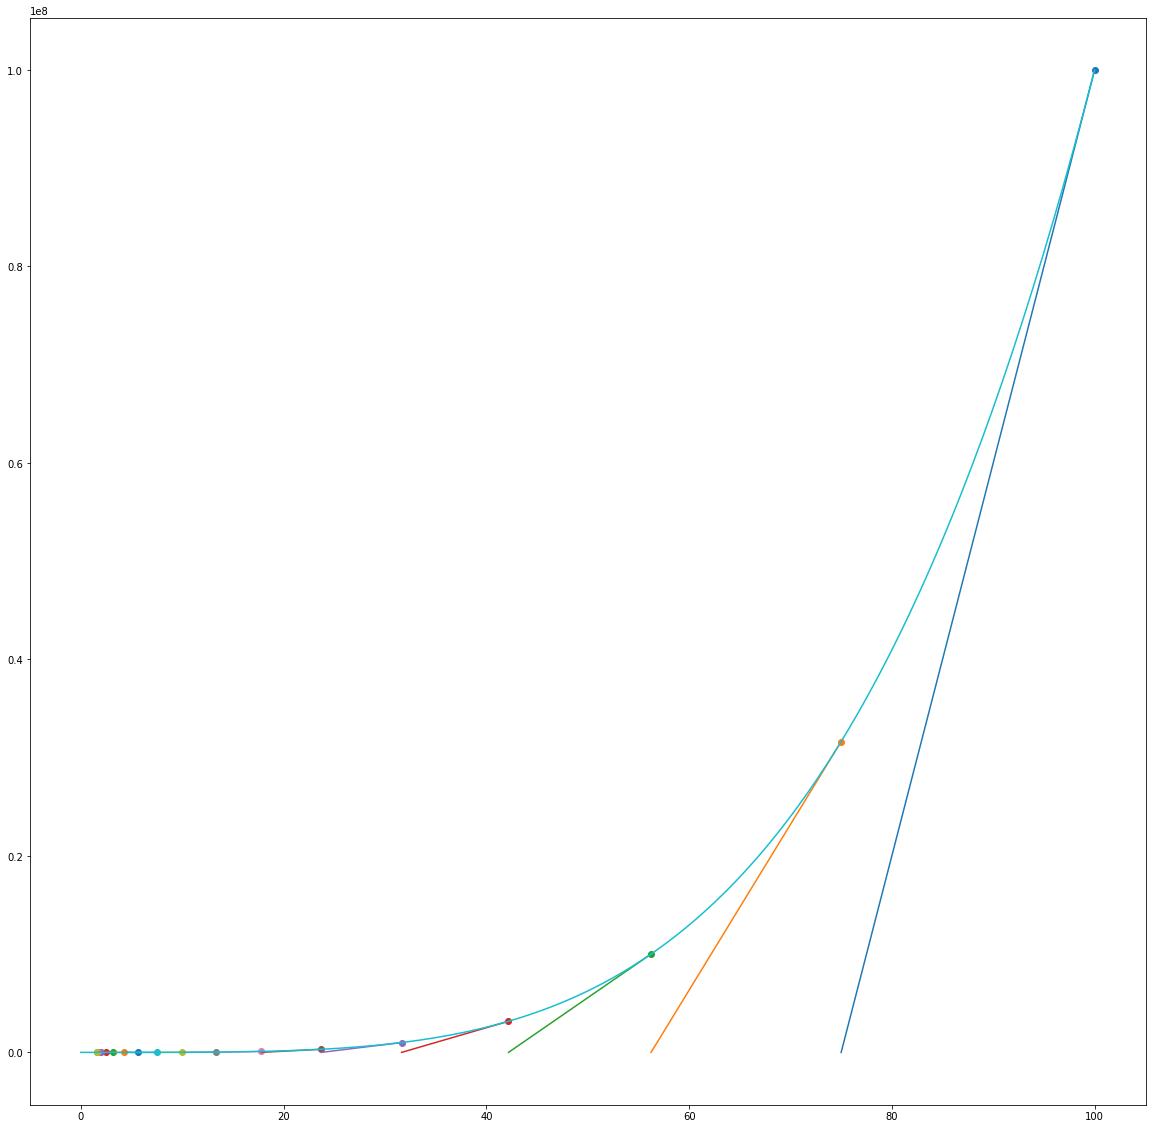

In [36]:
kas_met(x=100, fun=lambda x: x ** 4 - 2 * x - 4, der=lambda x: 4 * x ** 3 - 2, r=np.linspace(0, 100, 100))

In [40]:
4 ** 68

87112285931760246646623899502532662132736

In [39]:
68 ** 4

21381376

In [ ]:
87 112 285 931 760 246 646 623 899 502 532 662 132 736
68 ** 4
